In [44]:
import requests
import re
import urllib 
import os
import xarray as xr

from shapely.geometry import Point
import geopandas as gpd
import numpy as np

from scipy.interpolate import griddata


In [3]:
def palau_eez(df):
    df_eez = gpd.read_file('../palauEEZ.geojson')
    eez = df_eez['geometry'].values[0]
    in_palau = []
    longlat = df[['longitude','latitude']].values.tolist()
    for x in longlat:
        point = Point(x[0],x[1])
        if eez.contains(point) or point.within(eez):
            in_palau.append((x[0],x[1]))
    return df[df[['longitude', 'latitude']].apply(tuple, axis=1).isin(in_palau)]

In [ ]:
def filter_palau(df):
    filtered = df[(df["latitude"]>= 1.25)&
                                (df["latitude"]<=13.00)&(df["longitude"]<=139.00)&
                                (df["longitude"]>=128)]
    return filtered

## Source of NOAA OI-SST Monthly
http://apdrc.soest.hawaii.edu/erddap/griddap/hawaii_soest_31a3_72d5_401e.html

In [4]:
#Download directory
download_folder = './oisst/'

In [5]:
if not os.path.exists(download_folder):
    os.makedirs(download_folder)

In [6]:
oisst_download = "http://apdrc.soest.hawaii.edu/erddap/griddap/hawaii_soest_31a3_72d5_401e.nc?sst[(1854-01-15):1:(2023-12-15T00:00:00Z)][(1.5214):1:(11.6587)][(129.4088):1:(137.0541)],ssta[(1854-01-15):1:(2023-12-15T00:00:00Z)][(1.5214):1:(11.6587)][(129.4088):1:(137.0541)]"

In [7]:
urllib.request.urlretrieve(oisst_download, download_folder + 'hawaii_soest_f377_d8b2_5d80Palau_RIM.nc')

('./oisst/hawaii_soest_f377_d8b2_5d80Palau_RIM.nc',
 <http.client.HTTPMessage at 0x7fc3005e0a30>)

In [ ]:
#Alternative way to load in dataset instead of downloading directly to a folder
oisst = xr.open_dataset(oisst_download, decode_times=True)

In [46]:
oisst = xr.open_dataset(download_folder + 'hawaii_soest_f377_d8b2_5d80Palau_RIM.nc')
oisst_sst = oisst.sst
oisst_df = oisst_sst.to_dataframe()
oisst_df = oisst_df.reset_index()
oisst_df

,time,latitude,longitude,sst
0,1854-01-15,2.0,130.0,28.338690
1,1854-01-15,2.0,132.0,28.436239
2,1854-01-15,2.0,134.0,28.460934
3,1854-01-15,2.0,136.0,28.542139
4,1854-01-15,2.0,138.0,28.637644
...,...,...,...,...
61195,2023-12-15,12.0,130.0,NaN
61196,2023-12-15,12.0,132.0,NaN
61197,2023-12-15,12.0,134.0,NaN
61198,2023-12-15,12.0,136.0,NaN


In [8]:
# oisst_df = palau_eez(oisst_df) 

In [47]:
oisst_df

,time,latitude,longitude,sst
0,1854-01-15,2.0,130.0,28.338690
1,1854-01-15,2.0,132.0,28.436239
2,1854-01-15,2.0,134.0,28.460934
3,1854-01-15,2.0,136.0,28.542139
4,1854-01-15,2.0,138.0,28.637644
...,...,...,...,...
61195,2023-12-15,12.0,130.0,NaN
61196,2023-12-15,12.0,132.0,NaN
61197,2023-12-15,12.0,134.0,NaN
61198,2023-12-15,12.0,136.0,NaN


In [48]:
oisst_cleaned = oisst_df[~oisst_df["sst"].isnull()]

In [49]:
oisst_cleaned = oisst_cleaned.reset_index(drop = True)
oisst_cleaned

,time,latitude,longitude,sst
0,1854-01-15,2.0,130.0,28.338690
1,1854-01-15,2.0,132.0,28.436239
2,1854-01-15,2.0,134.0,28.460934
3,1854-01-15,2.0,136.0,28.542139
4,1854-01-15,2.0,138.0,28.637644
...,...,...,...,...
61015,2023-06-15,12.0,130.0,29.773113
61016,2023-06-15,12.0,132.0,29.792627
61017,2023-06-15,12.0,134.0,29.822411
61018,2023-06-15,12.0,136.0,29.829288


In [12]:
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader

In [13]:
# add mapping routines
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

In [50]:
oisst_cleaned

,time,latitude,longitude,sst
0,1854-01-15,2.0,130.0,28.338690
1,1854-01-15,2.0,132.0,28.436239
2,1854-01-15,2.0,134.0,28.460934
3,1854-01-15,2.0,136.0,28.542139
4,1854-01-15,2.0,138.0,28.637644
...,...,...,...,...
61015,2023-06-15,12.0,130.0,29.773113
61016,2023-06-15,12.0,132.0,29.792627
61017,2023-06-15,12.0,134.0,29.822411
61018,2023-06-15,12.0,136.0,29.829288


In [51]:
oisst_cleaned[oisst_cleaned['time'] > '1985-12-31']

,time,latitude,longitude,sst
47520,1986-01-15,2.0,130.0,28.456985
47521,1986-01-15,2.0,132.0,28.535034
47522,1986-01-15,2.0,134.0,28.621572
47523,1986-01-15,2.0,136.0,28.768713
47524,1986-01-15,2.0,138.0,28.944002
...,...,...,...,...
61015,2023-06-15,12.0,130.0,29.773113
61016,2023-06-15,12.0,132.0,29.792627
61017,2023-06-15,12.0,134.0,29.822411
61018,2023-06-15,12.0,136.0,29.829288


In [52]:
oisst_slice = oisst_cleaned[oisst_cleaned['time'] == '1986-01-15'].reset_index(drop = True)

In [53]:
oisst_slice

,time,latitude,longitude,sst
0,1986-01-15,2.0,130.0,28.456985
1,1986-01-15,2.0,132.0,28.535034
2,1986-01-15,2.0,134.0,28.621572
3,1986-01-15,2.0,136.0,28.768713
4,1986-01-15,2.0,138.0,28.944002
5,1986-01-15,4.0,130.0,28.251936
6,1986-01-15,4.0,132.0,28.384151
7,1986-01-15,4.0,134.0,28.534685
8,1986-01-15,4.0,136.0,28.702414
9,1986-01-15,4.0,138.0,28.858959


/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_33821/1017871972.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm = ctf.norm, cmap = ctf.cmap),orientation='horizontal',


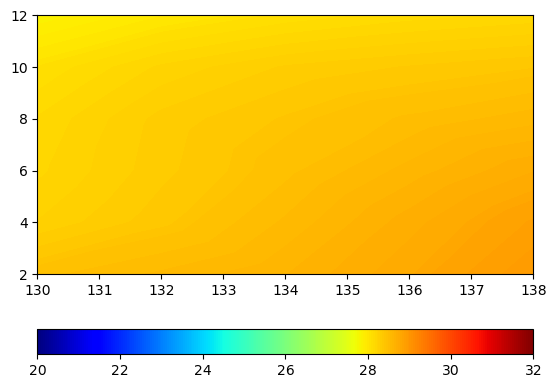

In [55]:
vmin, vmax = 20, 32

x_orig = np.asarray(oisst_slice.longitude.tolist())
y_orig = np.asarray(oisst_slice.latitude.tolist())
z_orig = np.asarray(oisst_slice.sst.tolist())

x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')

ctf = plt.contourf(x_mesh, y_mesh,z_mesh, 50,
             vmin=vmin,vmax=vmax, cmap=cm.jet)

plt.colorbar(cm.ScalarMappable(norm = ctf.norm, cmap = ctf.cmap),orientation='horizontal',
             ticks = range(vmin,vmax+2,2))
# ctf = plt.contourf(oisst_slice['longitude'], oisst_slice['latitude'], oisst_slice.squeeze(), 50,
#              vmin=vmin,vmax=vmax, cmap=cm.jet)

TypeError: Length of x (26442) must match number of columns in z (4)

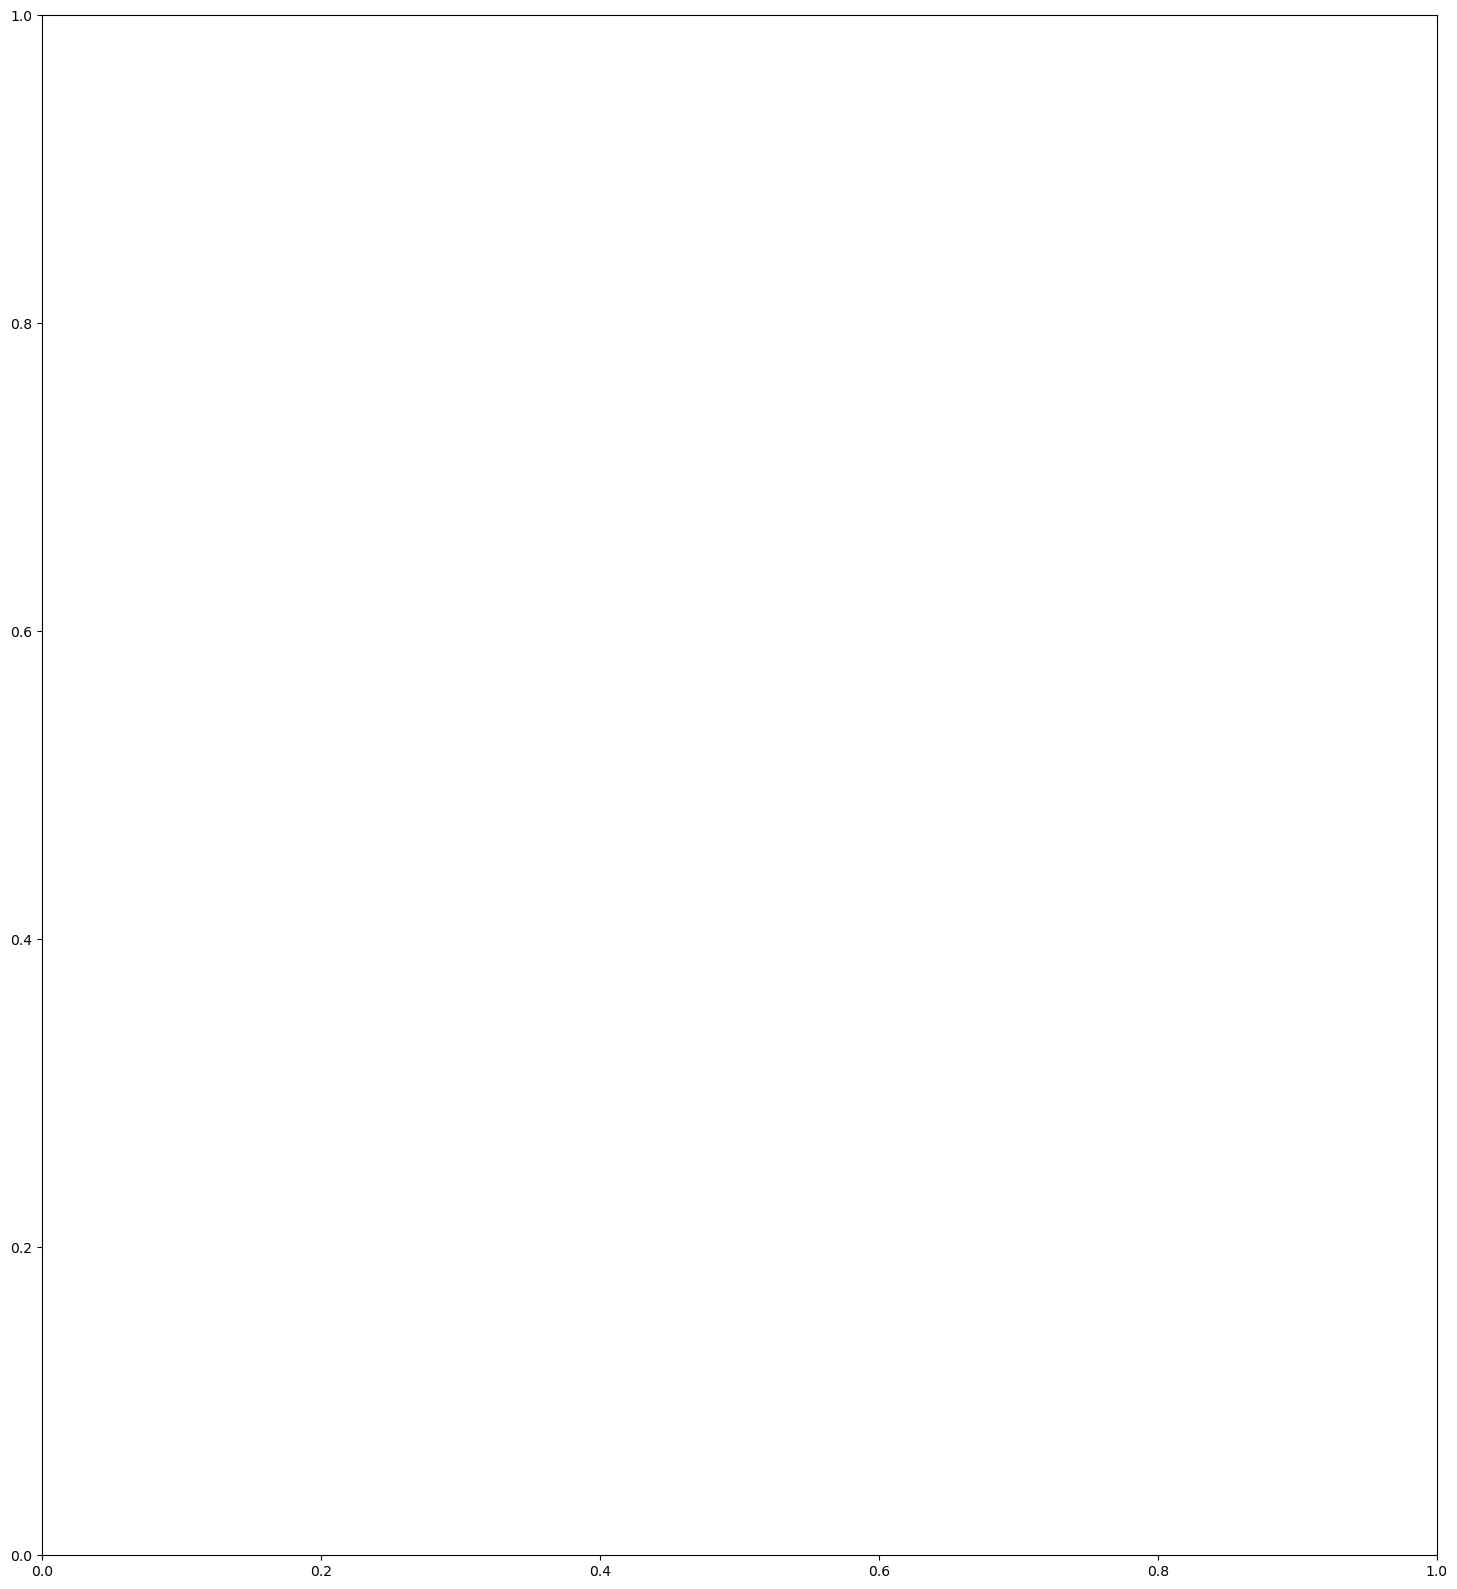

In [19]:
# set up the figure
fig = plt.subplots( figsize = (18, 20) )

# set color range
vmin, vmax = 20, 32

# # 2. Plot OISST
# # set projection, center on the Pacific
# ax2 = plt.subplot(2,2,2,projection = ccrs.PlateCarree(central_longitude=180.0))

# # add coastlines
# ax2.add_feature(cf.COASTLINE)

# # add lat/lon labels (left and bottom)
# gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0, color='gray',
#                 alpha=0.75, linestyle='--')
# gl.xlabels_top = False
# gl.ylabels_right = False

# # set label size and color
# gl.xlabel_style = {'size':15, 'color': 'black'}
# gl.ylabel_style = {'size':15, 'color': 'black'}

# # specify where to label
# gl.xlocator = mticker.FixedLocator([140, 160, 180, -160, -140, -120])
# gl.ylocator = mticker.FixedLocator([-30, -20, -10, 0, 10, 20, 30])

# # specify how to label
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER


# plot variable
ctf = plt.contourf(oisst_cleaned['longitude'], oisst_cleaned['latitude'], oisst_cleaned.squeeze(), 50,
             vmin=vmin,vmax=vmax, cmap=cm.jet)
#                    , extend = 'both', transform=ccrs.PlateCarree())


# # add EEZ's as black lines
# for i, row in shpf180.iterrows():
#     geom = row.geometry
#     sp = ShapelyFeature([geom],ccrs.PlateCarree(central_longitude=180.0),
#                         edgecolor='black',facecolor='none',lw=0.7)
#     ax2.add_feature(sp)

# Add a colorbar and title
#plt.colorbar(ctf,orientation='horizontal',ax=ax2)
plt.colorbar(cm.ScalarMappable(norm = ctf.norm, cmap = ctf.cmap),orientation='horizontal',
             ticks = range(vmin,vmax+2,2))
plt.title('OI SST ' + date_static_t)
